# Telecom Churn Case Study(Machine learning -II)

# Problem Statement

### Business problem overview

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

# Objective
The main goal of the case study is to build ML models to predict churn. The predictive model that you’re going to build will the following purposes:

1. It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

2. It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.

3. Even though overall accuracy will be your primary evaluation metric, you should also mention other metrics like precision, recall, etc. for the different models that can be used for evaluation purposes based on different business objectives. For example, in this problem statement, one business goal can be to build an ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Make sure you mention which metric can be used in such scenarios.

4. Recommend strategies to manage customer churn based on your observations.

### Goal:

It is your job to predict if a customer will churn, given the ~170 columns containing 
- customer behavior
- usage patterns 
- payment patterns 
- Other features that might be relevant. 

Your target variable is **"churn_probability"**

Note: Make sure your accuracy is greater than the sample submission that is present in the leaderboard

# Steps 
#### Step 1 :
- Data reading
- Data understanding, identification of potentially useful and non-useful attributes and variable importance and impact estimation
- Data Cleaning
- Missing values imputation 
- outlier removal
- column level standardization (for e.g., date, etc.) into one format
   
#### Step-2 :
Data Preparation
  - Derived variable
  - EDA: Performing basic preliminary data analysis including finding the correlation between variables and scatter plots to identify relationships between variables
  - Split data in to train and test sets
  - Performing Scaling
  - Performing advanced data analysis, including plotting relevant heatmaps, histograms, and basic clustering to find patterns in the data
 
#### Step-3 :
- Handle class imbalance
- Dimensionality Reduction using PCA
- Classification models to predict Churn (Use various Models )

#### Step-4 :
- Model Selection, Model Building, and  Prediction :
- Identifying the type of problem and making a list of decisive models from all available choices
- Choosing a training mechanism; for e.g., cross-validation, etc., and tuning hyperparameters of each model
- Testing each model on the respective model evaluation metric
- Choosing the best model based on the fit of the data set and output variable
- Using ensemble options to improve the efficacy based on the evaluation metric stated in the problem

#### Step-5 :
- Final Conclusion 

## Import  Libraries

In [ ]:
! pip install imblearn
! pip install statsmodels
! pip install seaborn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# Import the logistic regression module
from sklearn.linear_model import LogisticRegression

# Importing 'variance_inflation_factor' or VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import RFE for RFE selection
from sklearn.feature_selection import RFE

# Importing statsmodels
import statsmodels.api as sm

# Importing the precision recall curve
from sklearn.metrics import precision_recall_curve

# Importing evaluation metrics from scikitlearn 
from sklearn import metrics

from imblearn.over_sampling import SMOTE

from sklearn.decomposition import IncrementalPCA

# To suppress the warnings which will be raised
import warnings
warnings.filterwarnings('ignore')

# Displaying all Columns without restrictions
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
#pd.set_option('display.max_colwidth', -1)


# import required libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC


**Data reading**

In [ ]:
data_df = pd.read_csv(r"/kaggle/input/telecom-churn-case-study-hackathon-c51/train.csv")
data_df.shape

**Data Understanding**

The train.csv currently has 172 columns with 69999 rows

In [ ]:
# look at initial rows of the data
data_df.head()

In [ ]:
# create backup of data
original_data_df = data_df.copy()

In [ ]:
#check the columns of data
data_df.columns

In [ ]:
#Checking the numerical columns data distribution statistics
data_df.describe()

In [ ]:
#check dataframe for null and datatype 
data_df.info()

In [ ]:
# feature type summary
data_df.info(verbose=1)

In [ ]:
# Checking for null values
data_df.isnull().sum()

In [ ]:
# Checking the null value percentage
data_df.isna().sum()/data_df.isna().count()*100

In [ ]:
# Checking for the duplicates
data_df.drop_duplicates(subset=None, inplace=True)
data_df.shape

There are no duplicates

In [ ]:
#check the size of data
data_df.size

In [ ]:
#check the axes of data
data_df.axes

In [ ]:
#check the dimensions of data
data_df.ndim

In [ ]:
#check the values of data
data_df.values

In [ ]:
#list of columns
pd.DataFrame(data_df.columns)

**Data Cleaning , Imputing missing values**

In [ ]:
# look at missing value ratio in each column
missing_values = data_df.isnull().sum()*100/data_df.shape[0]
missing_df=missing_values.to_frame()
missing_df=missing_df.rename(columns={0:'MissingValue%'})
missing_df.sort_values(by=['MissingValue%'],ascending=False).head(20)


Observation from the above data frame shows **74%** values for **recharge** related data are missing.

In [ ]:
# some recharge columns have minimum value of 1 while some don't have
recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
                 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 
                 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 
                 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 
                 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
                 ]

data_df[recharge_cols].describe(include='all')

In [ ]:
sns.heatmap(pd.isnull(data_df),cmap='viridis')

 We can create new feature as total_rech_amt_data using total_rech_data and av_rech_amt_data to capture amount utilized by customer for data.

 Also as the minimum value is 1 we can impute the NA values by 0, Considering there were no recharges done by the customer.

In [ ]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer didn't recharge
data_df.loc[data_df.total_rech_data_6.isnull() & data_df.date_of_last_rech_data_6.isnull(), ["total_rech_data_6", "date_of_last_rech_data_6"]].head(20)

In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their numbers that month.

In [ ]:
# create a list of recharge columns where we will impute missing values with zeroes
zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'
       ]

In [ ]:
sns.heatmap(data=pd.isnull(data_df[zero_impute]),cmap='viridis')

In [ ]:
# impute missing values with 0
data_df[zero_impute] = data_df[zero_impute].apply(lambda x: x.fillna(0))

In [ ]:
# now we have to  make sure the values are imputed correctly for that we can check "Missing value ratio"
data_df[zero_impute].isnull().sum()*100/data_df.shape[1]

In [ ]:
# now we can check the "statistics Summary"
data_df[zero_impute].describe(include='all')

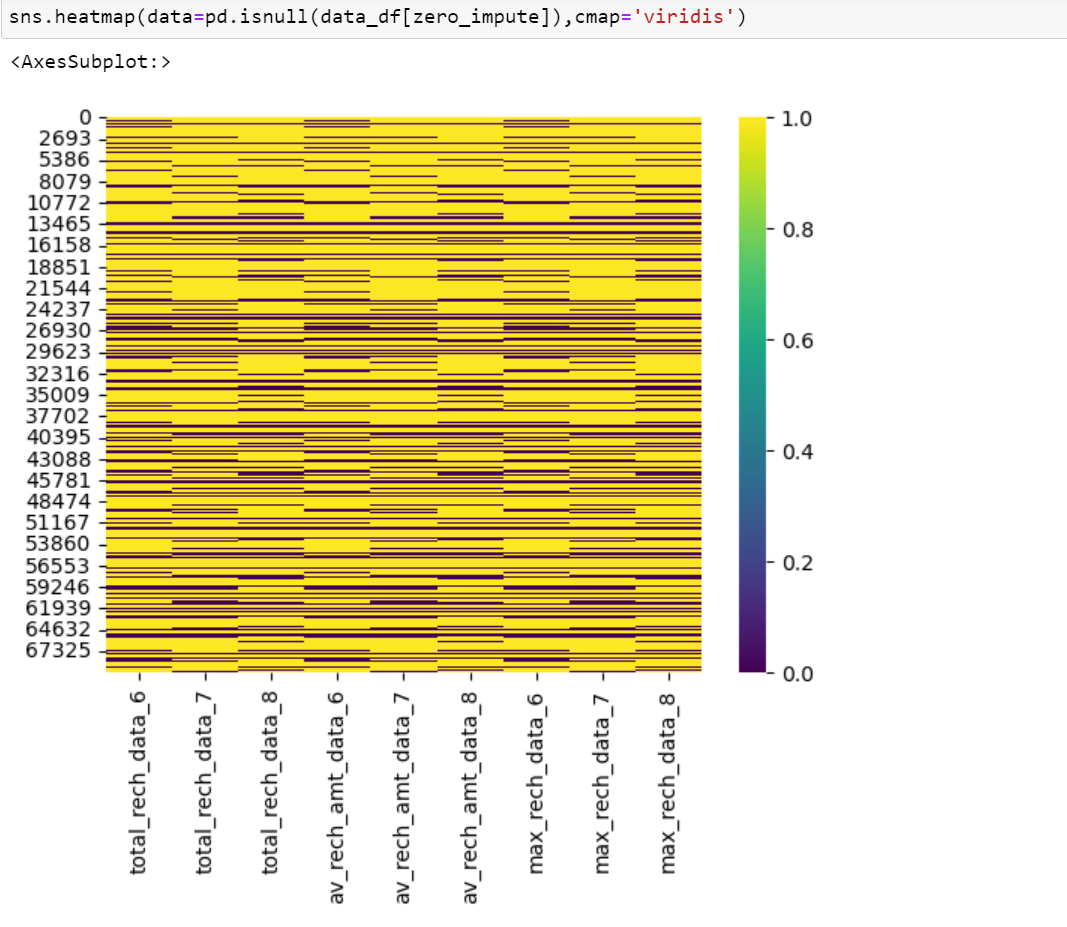#Before Imput 

In [ ]:
#AFter impute all the null values are removed
sns.heatmap(data=pd.isnull(data_df[zero_impute]),cmap='viridis')

In [ ]:
# now we can create some column name list by there types using description of columns
id_cols = ['id', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',             
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',             
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8'             
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',             
             'fb_user_6',
             'fb_user_7',
             'fb_user_8'             
            ]

num_cols = [column for column in data_df.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == data_df.shape[1])

In [ ]:
data_df.columns

In [ ]:
# drop id and date columns
churn_data_df = data_df.drop(id_cols + date_cols,axis=1)
#check the shape again
churn_data_df.shape

We will replace missing values in the categorical values with '-1' where '-1' will be a new category.

In [ ]:
# replace missing values with '-1' in categorical columns
churn_data_df[cat_cols] = churn_data_df[cat_cols].apply(lambda x: x.fillna(-1))

In [ ]:
# missing value ratio
churn_data_df[cat_cols].isnull().sum()*100/churn_data_df.shape[0]

Droping variables with more than 70% of missing values (we can call it as threshold )

In [ ]:
initial_cols = churn_data_df.shape[1]

MISSING_THRESHOLD = 0.5

include_cols = list(churn_data_df.apply(lambda column: True if column.isnull().sum()/churn_data_df.shape[0] < MISSING_THRESHOLD else False))

drop_missing = pd.DataFrame({'features':churn_data_df.columns , 'include': include_cols})
drop_missing.loc[drop_missing.include == True,:]

In [ ]:
# now we can drop  some more columns
churn_data_df = churn_data_df.loc[:, include_cols]

dropped_cols = churn_data_df.shape[1] - initial_cols
dropped_cols

In [ ]:
#rechecking the shape of a dataframe
churn_data_df.shape

In [ ]:
# rechecking the missing values for how many missing values has left
churn_data_df.isnull().sum()*100/churn_data_df.shape[0]

In [ ]:
missing_values_2 = churn_data_df.isnull().sum()*100/churn_data_df.shape[0]


In [ ]:
missing_df_2=missing_values_2.to_frame()
missing_df_2=missing_df_2.rename(columns={0:'MissingValues%'})
missing_df_2.sort_values(by=['MissingValues%'],ascending=False).head(20)


only numerical variables have the missing values

In [ ]:
num_cols = [column for column in churn_data_df.columns if column not in id_cols + date_cols + cat_cols]
num_cols

for remaining numerical variables missing values hear we are imputing with meadian 

In [ ]:
#imputing with meadian for num_cols
churn_data_df[num_cols] = churn_data_df[num_cols].apply(lambda x: x.fillna(x.median()))

In [ ]:
#again checking for the missing values
churn_data_df.isnull().sum()*100/churn_data_df.shape[0]

In [ ]:
sns.heatmap(data=pd.isnull(churn_data_df[num_cols]),cmap='viridis')

In churn prediction, we assume that there are three phases of customer lifecycle :

. The ‘good’ phase [Month 6 & 7]
. The ‘action’ phase [Month 8]
. The ‘churn’ phase [Month 9]
In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.


# Filter high-value customers

Month 6 and 7 data to get high value customers

In [ ]:
# calculate the total data recharge amount for June and July --> number of recharges * average recharge amount
churn_data_df['total_data_rech_6'] = churn_data_df.total_rech_data_6 * churn_data_df.av_rech_amt_data_6
churn_data_df['total_data_rech_7'] = churn_data_df.total_rech_data_7 * churn_data_df.av_rech_amt_data_7

add total data recharge and total recharge to get total combined recharge amount for a month

In [ ]:
# calculate total recharge amount for June and July --> call recharge amount + data recharge amount
churn_data_df['amt_data_6'] = churn_data_df.total_rech_amt_6 + churn_data_df.total_data_rech_6
churn_data_df['amt_data_7'] = churn_data_df.total_rech_amt_7 + churn_data_df.total_data_rech_7

In [ ]:
# calculate average recharge done by customer in June and July
churn_data_df['av_amt_data_6_7'] = (churn_data_df.amt_data_6 + churn_data_df.amt_data_7)/2

In [ ]:
# look at the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(churn_data_df.av_amt_data_6_7.quantile(0.7)))


In [ ]:
churn_data_df.head()

In [ ]:
# retain only those customers who have recharged their mobiles with more than or equal to 70th percentile amount
churn_filtered = churn_data_df.loc[churn_data_df.av_amt_data_6_7 >= churn_data_df.av_amt_data_6_7.quantile(0.7), :]
churn_filtered = churn_filtered.reset_index(drop=True)


In [ ]:
churn_filtered.shape

In [ ]:
# delete variables created to filter high-value customers
churn_filtered = churn_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)


In [ ]:
churn_filtered.shape

 The number of customers with recharge value => than **70th percentile** is **21013** with **149 columns**



# Derive churn



To get the target variable
For that, we need to find the derive churn variable using total_ic_mou_8,total_og_mou_8,vol_2g_mb_8 and vol_3g_mb_8 attributes

In [ ]:
# Selecting the columns to define churn variable (i.e. TARGET Variable)
churn_col=['total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8']
churn_filtered[churn_col].info()

In [ ]:
# Initializing the churn variable.
churn_filtered['churn']=0

# Imputing the churn values based on the condition
churn_filtered['churn'] = np.where(churn_filtered[churn_col].sum(axis=1) == 0, 1, 0)

In [ ]:
# Checking the top 10 data
churn_filtered.head(10)

In [ ]:
churn_filtered.columns

In [ ]:
# lets find out churn/non churn percentage
print((churn_filtered['churn'].value_counts()/len(churn_data_df))*100)
((churn_filtered['churn'].value_counts()/len(churn_data_df))*100).plot(kind="pie")
plt.show()

### ***As we can see that 98% of the customers do not churn, there is a possibility of class imbalance*** 
Since this variable churn is the target variable, all the columns relating to this variable(i.e. all columns with suffix _8) can be dropped forn the dataset.


We can still clean the data by few possible columns relating to the good phase.

As we derived few columns in the good phase earlier, we can drop those related columns during creation.

In [ ]:
#churn['total_rech_amt_data_6']=churn['av_rech_amt_data_6'] * churn['total_rech_data_6']
# churn['total_rech_amt_data_7']=churn['av_rech_amt_data_7'] * churn['total_rech_data_7']

# # Calculating the overall recharge amount for the months 6,7 and 8

# churn['overall_rech_amt_6'] = churn['total_rech_amt_data_6'] + churn['total_rech_amt_6']
# churn['overall_rech_amt_7'] = churn['total_rech_amt_data_7'] + churn['total_rech_amt_7']

churn_filtered=churn_filtered.drop(['av_rech_amt_data_6',
                   'total_rech_data_6','total_rech_amt_6',
                  'av_rech_amt_data_7',
                   'total_rech_data_7','total_rech_amt_7'], axis=1)

We can also create new columns for the defining the good phase variables and drop the seperate 6th and 7 month variables.

Before proceding to check the remaining missing value handling, let us check the collineartity of the indepedent variables and try to understand their dependencies.

In [ ]:
# creating a list of column names for each month
mon_7_cols = [col for col in churn_filtered.columns if '_7' in col]
mon_8_cols = [col for col in churn_filtered.columns if '_8' in col]
mon_6_cols = [col for col in churn_filtered.columns if '_6' in col]


In [ ]:
mon_7_cols

In [ ]:
# lets check the correlation amongst the independent variables, drop the highly correlated ones
churn_corr = churn_filtered.corr()
churn_corr.loc[:,:] = np.tril(churn_corr, k=-1)
churn_corr = churn_corr.stack()
churn_corr
churn_corr[(churn_corr > 0.80) | (churn_corr < -0.80)].sort_values(ascending=False)

In [ ]:
col_to_drop=['fb_user_6','fb_user_7','total_ic_mou_6','total_ic_mou_7',               
               'std_og_t2t_mou_7','std_og_t2t_mou_6' ,'std_og_t2m_mou_7','std_ic_mou_7',]

# These columns can be dropped as they are highly collinered with other predictor variables.
# criteria set is for collinearity of 85%

#  dropping these column
churn_filtered.drop(col_to_drop, axis=1, inplace=True)

In [ ]:
# The curent dimension of the dataset after dropping few unwanted columns
churn_filtered.shape


# Data preparation

**EDA**

In [ ]:
# We have a column called 'aon'

# we can derive new variables from this to explain the data w.r.t churn.

# creating a new variable 'tenure'
churn_filtered['tenure'] = (churn_filtered['aon']/30).round(0)

# Since we derived a new column from 'aon', we can drop it
churn_filtered.drop('aon',axis=1, inplace=True)

In [ ]:
# Checking the distribution of he tenure variable

sns.distplot(churn_filtered['tenure'],bins=30)
plt.show()

In [ ]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
churn_filtered['tenure_range'] = pd.cut(churn_filtered['tenure'], tn_range, labels=tn_label)
churn_filtered['tenure_range'].head()

In [ ]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='tenure_range',y='churn', data=churn_filtered)
plt.show()

Maximum churn rate happens within 0-6 month, but it gradually decreases as the customer retains in the network.

The average revenue per user is good phase of customer is given by arpu_6 and arpu_7. since we have two separate averages, lets take an average to these two and drop the other columns

In [ ]:
churn_filtered["avg_arpu_6_7"]= (churn_filtered['arpu_6']+churn_filtered['arpu_7'])/2
churn_filtered['avg_arpu_6_7'].head()

In [ ]:
# Lets drop the original columns as they are derived to a new column for better understanding of the data

churn_filtered.drop(['arpu_6','arpu_7'], axis=1, inplace=True)


# The curent dimension of the dataset after dropping few unwanted columns
churn_filtered.shape

In [ ]:
# Visualizing the column created
sns.distplot(churn_filtered['avg_arpu_6_7'])
plt.show()

In [ ]:
# Checking Correlation between target variable(SalePrice) with the other variable in the dataset
plt.figure(figsize=(10,50))
#heatmap_churn = sns.heatmap(churn_filtered.corr()[['churn']].sort_values(ascending=False, by='churn'),annot=True, 
                              #  cmap='summer')
#heatmap_churn.set_title("Features Correlating with Churn variable", fontsize=15)

In [ ]:
churn_filtered.columns

. Avg Outgoing Calls & calls on roaming for 6 & 7th months are positively correlated with churn.
. Avg Revenue, No. Of Recharge for 8th month has negative correlation with churn.

In [ ]:
# lets now draw a scatter plot between total recharge and avg revenue for the 8th month
churn_filtered[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',
                                                              y='arpu_8')
plt.show()

In [ ]:
# Creating categories for month 8 column totalrecharge and their count
churn_filtered['total_rech_data_group_8']=pd.cut(churn_filtered['total_rech_data_8'],[-1,0,10,25,100],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])
churn_filtered['total_rech_num_group_8']=pd.cut(churn_filtered['total_rech_num_8'],[-1,0,10,25,1000],labels=["No_Recharge","<=10_Recharges","10-25_Recharges",">25_Recharges"])

In [ ]:
# Plotting the results

plt.figure(figsize=[12,4])
sns.countplot(data=churn_filtered,x="total_rech_data_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_data_8\n",churn_filtered['total_rech_data_group_8'].value_counts())
plt.show()
plt.figure(figsize=[12,4])
sns.countplot(data=churn_filtered,x="total_rech_num_group_8",hue="churn")
print("\t\t\t\t\tDistribution of total_rech_num_8 \n",churn_filtered['total_rech_num_group_8'].value_counts())
plt.show()

As the number of recharge rate increases, the churn rate decreases clearly.

In [ ]:
churn_filtered=churn_filtered.drop(['av_rech_amt_data_8','total_rech_data_8','sachet_2g_6','sachet_2g_7','sachet_3g_6',
              'sachet_3g_7','sachet_3g_8','last_day_rch_amt_6','last_day_rch_amt_7',
              'last_day_rch_amt_8',], axis=1)

now we can drop all "mou related" columns  except onnet and offnet variables

In [ ]:
churn_filtered=churn_filtered.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 
         'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
         'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
         'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 
         'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
         'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6',
         'spl_og_mou_7', 'spl_og_mou_8','total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 
         'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
         'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 
         'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8',
         'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'spl_ic_mou_6', 'spl_ic_mou_7',
         'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8',], axis=1)

In [ ]:
churn_filtered.shape

In [ ]:
plt.figure(figsize = (50, 50))
coolwarm=sns.color_palette("coolwarm", 12)
#sns.heatmap(churn_filtered.corr(),cmap="Greens")
plt.show()

In [ ]:
churn_filtered.info()

In [ ]:
churn_filtered=churn_filtered.drop(['total_rech_data_group_8','total_rech_num_group_8',] , axis=1)

In [ ]:
print(f'churn_filtered.shape: {churn_filtered.shape}')
churn_filtered.info()

In [ ]:
churn_filtered=churn_filtered.drop(['tenure_range'] , axis=1)

In [ ]:
churn_filtered.info()

In [ ]:
churn_rate = (sum(churn_filtered["churn"])/len(churn_filtered["churn"].index))*100
print(f'churn_rate: {churn_rate}')

# Split Data Into Train and Test Data

In [ ]:
churn_filtered.shape

In [ ]:
# divide data into train and test
X = churn_filtered.drop("churn", axis = 1)
y = churn_filtered.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4, stratify = y)

In [ ]:
# print shapes of train and test sets
print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')
print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')


# Scaling

In [ ]:
X_train.head()

In [ ]:
X_train.info()

In [ ]:
numeric_columns = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()

In [ ]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])

In [ ]:
X_train.head()

As there are many variables we will start the process of dropping variables after doing the RFE

# Modeling and Evaluation

## Data Imbalance Handling
Using SMOTE method, we can balance the data w.r.t. churn variable and proceed further

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [ ]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

# Logistic Regression

In [ ]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm

In [ ]:
# Logistic regression model
logm1 = sm.GLM(y_train_sm,(sm.add_constant(X_train_sm)), family = sm.families.Binomial())
logm1.fit().summary()

# Logistic Regression using Feature Selection (RFE method)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg,  n_features_to_select= 20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [ ]:
rfe.support_

In [ ]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

In [ ]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

# Assessing the model with StatsModels

In [ ]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
logm2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

In [ ]:
# Getting the predicted values on the train set
y_train_sm_pred = res.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

# Creating a dataframe with the actual churn flag and the predicted probabilities

In [ ]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train_sm.values, 'Converted_prob':y_train_sm_pred})
y_train_sm_pred_final.head()

# Creating new column 'churn_pred' with 1 if Churn_Prob > 0.8 else 0

In [ ]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

In [ ]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

In [ ]:
dataset = pd.DataFrame({'not_churn': confusion[:, 0], 'churn': confusion[:, 1]})
dataset

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(dataset, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['not churn', 'churn']); ax.yaxis.set_ticklabels(['not churn', 'churn']);

In [ ]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

### VIF values of the feature variables

In [ ]:
 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

## Metrics beyond simply accuracy

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP / float(TP+FN))

# Let us calculate specificity
print("Specificity = ",TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP/ float(TN+FP))

# positive predictive value 
print ("Precision = ",TP / float(TP+FP))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

###  ROC Curve

In [ ]:
# Defining a function to plot the roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Prediction Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob, drop_intermediate = False )

In [ ]:
# Plotting the curve for the obtained metrics
draw_roc(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

#### Finding Optimal Cutoff Point

In [ ]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

In [ ]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**Initially we selected the optimum point of classification as 0.5.<br><br>From the above graph, we can see the optimum cutoff is slightly higher than 0.5 but lies lower than 0.6. So lets tweek a little more within this range.**

In [ ]:
# Let's create columns with refined probability cutoffs 
numbers = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

In [ ]:
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.50,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

In [ ]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

**From the above graph we can conclude, the optimal cutoff point in the probability to define the predicted churn variabe converges at `0.53`**

In [ ]:
#### From the curve above,we can take 0.53 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Converted_prob.map( lambda x: 1 if x > 0.53 else 0)

y_train_sm_pred_final.head()

In [ ]:
# Calculating the ovearall accuracy again
print("The overall accuracy of the model now is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred))

In [ ]:
confusion2 = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.final_churn_pred )
print(confusion2)

In [ ]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP2 / float(TP2+FN2))

# Let us calculate specificity
print("Specificity = ",TN2 / float(TN2+FP2))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP2/ float(TN2+FP2))

# positive predictive value 
print ("Precision = ",TP2 / float(TP2+FP2))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

#### Precision and recall tradeoff

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Converted, y_train_sm_pred_final.Converted_prob)

# Plotting the curve
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "y-")
plt.show()

### Making predictions on the test set
**Transforming and feature selection for test data**

In [ ]:
# Scaling the test data
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])
X_test.head()

In [ ]:
# Feature selection
X_test=X_test[rfe_columns]
X_test.head()

In [ ]:
# Adding constant to the test model.
X_test_SM = sm.add_constant(X_test)

## Predicting the target variable

In [ ]:
y_test_pred = res.predict(X_test_SM)
print("\n Ten probability value of the prediction are:\n",y_test_pred[:10])

In [ ]:
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

In [ ]:
y_pred=y_pred.rename(columns = {0:"Conv_prob"})

In [ ]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

In [ ]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

In [ ]:
y_pred_final['test_churn_pred'] = y_pred_final.Conv_prob.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()

In [ ]:
# Checking the overall accuracy of the predicted set.
metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred)

**Metrics Evaluation**

In [ ]:
# Confusion Matrix
confusion2_test = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion2_test)

In [ ]:

confusion2_test_df = pd.DataFrame({'not_churn':confusion2_test[:,0],'churn': confusion2_test[:,1]})
confusion2_test_df

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(confusion2_test_df, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['not churn', 'churn']); ax.yaxis.set_ticklabels(['not churn', 'churn']);

In [ ]:
# Calculating model validation parameters
TP3 = confusion2_test[1,1] # true positive 
TN3 = confusion2_test[0,0] # true negatives
FP3 = confusion2_test[0,1] # false positives
FN3 = confusion2_test[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity = ",TP3 / float(TP3+FN3))

# Let us calculate specificity
print("Specificity = ",TN3 / float(TN3+FP3))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False Positive Rate = ",FP3/ float(TN3+FP3))

# positive predictive value 
print ("Precision = ",TP3 / float(TP3+FP3))

# Negative predictive value
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

### Explaining the results

In [ ]:
print(f"Accuracy: {round(metrics.accuracy_score(y_pred_final.churn, y_pred_final.test_churn_pred),2)*100} %")
print(f"sensitivity: {round(TP3 / float(TP3+FN3),2)*100} %")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n") 

In [ ]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final.churn,y_pred_final.Conv_prob, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn,y_pred_final.Conv_prob)

- The AUC score for train dataset is **0.86** and the test dataset is **0.85**.
- As the values test almost matches the accuracy of the train, we concule it's a **good model** 

# PCA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [ ]:
X_train.shape

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(random_state=42)

In [ ]:
pca.fit(X_train)

In [ ]:
pca.components_

### Analysing the explained variance ratio

In [ ]:
pca.explained_variance_ratio_

In [ ]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [ ]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

we can use IncrementalPCA for the best result

In [ ]:
from sklearn.decomposition import IncrementalPCA

In [ ]:
pca_final = IncrementalPCA(n_components=16)

In [ ]:
X_train.shape

In [ ]:
df_train_pca = pca_final.fit_transform(X_train)

In [ ]:
df_train_pca.shape

In [ ]:
corr_coef = np.corrcoef(df_train_pca.transpose())

In [ ]:
corr_coef.shape

In [ ]:
print(f'X_test.shape:{X_test.shape}')
X_test.head()

In [ ]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

### logistic regression on the Principal components

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
learner_pca = LogisticRegression()

In [ ]:
model_pca = learner_pca.fit(df_train_pca, y_train)

## Making predictions on the test set

In [ ]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [ ]:
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

### Confusion matrix, Sensitivity and Specificity

In [ ]:
pred_probs_test1 = model_pca.predict(df_test_pca)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, pred_probs_test1)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, pred_probs_test1))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

## Making predictions on the train set

In [ ]:
pred_probs_train = model_pca.predict_proba(df_train_pca)

In [ ]:
"{:2.2}".format(metrics.roc_auc_score(y_train, pred_probs_train[:,1]))

### Confusion matrix, Sensitivity and Specificity

In [ ]:
pred_probs_train1 = model_pca.predict(df_train_pca)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, pred_probs_train1)
print(confusion)

In [ ]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:

print("Accuracy:-",metrics.accuracy_score(y_train, pred_probs_train1))
print("Sensitivity:-",TP / float(TP+FN))
print("Specificity:-", TN / float(TN+FP))

## Decision Tree with PCA

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
!pip install pydotplus

In [ ]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus
import graphviz


In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split': [50, 150, 50]
}

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
grid_search.fit(df_train_pca, y_train)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

In [ ]:
score_df.nlargest(5,"mean_test_score")

In [ ]:
grid_search.best_estimator_

In [ ]:
dt_best = DecisionTreeClassifier( random_state = 42,
                                  max_depth=10, 
                                  min_samples_leaf=20,
                                  min_samples_split=50)

In [ ]:
dt_best.fit(df_train_pca, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt     

def create_confusion_matrix(df):
    ax= plt.subplot()
    sns.heatmap(df, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['not churn', 'churn']); ax.yaxis.set_ticklabels(['not churn', 'churn']);

In [ ]:
train_values =confusion_matrix(y_train, dt_best.predict(df_train_pca))
conf_train_df = pd.DataFrame({'not churn': train_values[:,0],'churn': train_values[:,1]})
create_confusion_matrix(conf_train_df)


In [ ]:

test_values =confusion_matrix(y_test, dt_best.predict(df_test_pca))
conf_test_df = pd.DataFrame({'not churn': test_values[:,0],'churn': test_values[:,1]})
create_confusion_matrix(conf_test_df)

In [ ]:


def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(df_train_pca)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(df_train_pca)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(df_test_pca)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(df_test_pca)))

In [ ]:
evaluate_model(dt_best)

##  Random Forest with PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [ ]:
rf.fit(df_train_pca, y_train)

In [ ]:
rf.oob_score_

In [ ]:
from sklearn.metrics import RocCurveDisplay

In [ ]:
# svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
# rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=svc_disp.ax_)
RocCurveDisplay.from_estimator(rf, df_train_pca, y_train)
# plot_roc_curve(rf, df_train_pca, y_train)
plt.show()

### Hyper-parameter tuning for the Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [ ]:
params = {
    'max_depth': [2,3,5],
    'min_samples_leaf': [50,100],
    'min_samples_split': [ 100, 150, ],
    'n_estimators': [100, 200 ]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [ ]:
grid_search.fit(df_train_pca, y_train)

In [ ]:
grid_search.best_score_

In [ ]:
grid_search.best_params_

In [ ]:
rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             n_estimators=200)

In [ ]:
print(f'df_train_pca.shape :{df_train_pca.shape}')

In [ ]:
df_train_pca

In [ ]:
rfc_model.fit(df_train_pca, y_train)

In [ ]:
evaluate_model(rfc_model)


### Conclusion :
The best model to predict the churn is observed to be Random Forest based on the accuracy as performance measure.

The incoming calls (with local same operator mobile/other operator mobile/fixed lines, STD or Special) plays a vital role in understanding the possibility of churn. Hence, the operator should focus on incoming calls data and has to provide some kind of special offers to the customers whose incoming calls turning lower.

After comparision among all the models such as LR, LR with PCA, Decision Tree with PCA and RandomForest with PCA we conculde that Random Forest with PCA has the best performance in predicting the churn

###  Random Forest with PCA:
- Train Accuracy :~ 95%
- Test Accuracy :~ 96%

In [ ]:
churn_test = pd.read_csv(r"/kaggle/input/telecom-churn-case-study-hackathon-c51/test.csv")

In [ ]:
churn_test.head()

In [ ]:
churn_test[zero_impute] = churn_test[zero_impute].apply(lambda x: x.fillna(0))

In [ ]:
churn_test.shape

In [ ]:
churn_test['total_data_rech_6'] = churn_test.total_rech_data_6 * churn_test.av_rech_amt_data_6
churn_test['total_data_rech_7'] = churn_test.total_rech_data_7 * churn_test.av_rech_amt_data_7

In [ ]:
churn_test['amt_data_6'] = churn_test.total_rech_amt_6 + churn_test.total_data_rech_6
churn_test['amt_data_7'] = churn_test.total_rech_amt_7 + churn_test.total_data_rech_7
churn_test['av_amt_data_6_7'] = (churn_test.amt_data_6 + churn_test.amt_data_7)/2
churn_test["avg_arpu_6_7"]= (churn_test['arpu_6']+churn_test['arpu_7'])/2
churn_test['tenure'] = (churn_test['aon']/30).round(0)

In [ ]:
# Initializing the churn variable.
churn_test['churn']=0

# Imputing the churn values based on the condition
churn_test['churn'] = np.where(churn_test[churn_col].sum(axis=1) == 0, 1, 0)

In [ ]:
churn_test['churn_probability'] = 0

In [ ]:
print(f'churn_test.shape:{churn_test.shape}')

In [ ]:
churn_test[cat_cols] = churn_test[cat_cols].apply(lambda x: x.fillna(-1))

In [ ]:
churn_test.info()

In [ ]:
churn_filtered.columns

In [ ]:

pred_churn_filtered=churn_filtered.columns
pred_churn_filtered = pred_churn_filtered.insert(0,'id')


In [ ]:
pred_churn_filtered

In [ ]:
churn_test = churn_test[pred_churn_filtered]

In [ ]:
churn_test.shape

In [ ]:
churn_test.head()

In [ ]:
churn_test_id = churn_test[['id']]
churn_test = churn_test.drop("id", axis = 1)
churn_test = churn_test.drop("churn", axis = 1)

In [ ]:
churn_test_null = churn_test.isnull().sum().sum() / np.product(churn_test.shape) * 100
churn_test_null

In [ ]:
for col in churn_test.columns:
    null_col = churn_test[col].isnull().sum() / churn_test.shape[0] * 100
    print("{} : {:.2f}".format(col,null_col))

In [ ]:
for col in churn_test.columns:
    null_col = churn_test[col].isnull().sum() / churn_test.shape[0] * 100
    if null_col > 0:
        churn_test[col] = churn_test[col].fillna(churn_test[col].mode()[0])

In [ ]:
churn_test.isnull().sum().sum()

In [ ]:
df_pred_pca = pca_final.transform(churn_test)
print(df_pred_pca.shape)

In [ ]:
churn_test['churn_probability'] = rfc_model.predict(df_pred_pca)

churn_test_pred_final = pd.concat([churn_test_id, churn_test], axis=1)

In [ ]:
unique_values = churn_test_pred_final['churn_probability'].sum()

unique_values

In [ ]:
evaluate_model(rfc_model)

In [ ]:
for i in list(churn_filtered.columns):
    if i not in list(churn_test.columns):
        print(i)

In [ ]:
churn_test['churn_probability'].head()

In [ ]:
churn_test_pred_final[['id', 'churn_probability']].to_csv(r'/kaggle/working/submission.csv', index=False)

In [ ]:
sol_df = pd.read_csv('/kaggle/working/submission.csv')
sol_df.head()

In [ ]:
print(f'churn_test_pred_final.shape :{churn_test_pred_final.shape}')

In [ ]:
churn_test_pred_final.head()

In [ ]:
churn_test_pred_final.columns

In [ ]:
churn_test_pred_final['churn_probability'].head()

In [ ]:
churn_test_pred_final.columns

In [ ]:
offnet_usage_service_col = churn_test_pred_final.columns[churn_test_pred_final.columns.str.contains('offnet.*mou',regex=True)]

In [ ]:

def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = churn_test
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn_probability",hue="churn_probability",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn_probability",hue="churn_probability",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn_probability",hue="churn_probability",
                showfliers=False,palette=("plasma"))
    plt.show()

plot_box_chart('offnet_mou')

In [ ]:
plot_box_chart('max_rech_amt')

 **We do notice there is huge difference between recharge amount between churn and not churned customers in 8th month**

In [ ]:
tenure_data= churn_test_pred_final
tenure_data['tenure_range'] = pd.cut(tenure_data['tenure'], tn_range, labels=tn_label)
tenure_data['tenure_range'].head()

In [ ]:

plt.figure(figsize=(6,4))
sns.countplot(x = 'tenure_range', hue = 'churn_probability',data = churn_test_pred_final,palette=("plasma"))
plt.show()


**We do notice the churn rate is hugher in customer below 5 years from the above graph**